# Introduction

### Project goals

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will try to answer the following questions:

+ What is the distribution of conservation status for species?
+ Are certain types of species more likely to be endangered?
+ Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

### Project structure

The project is divided in the following sections:
- **Import Python modules**: import modules that will be necessary for the project
- **Loading the Data**: load data into dataframes and have a glance at the data
- **Cleaning the Data**: check for null values, duplicates, data types and change specific names if necessary
- **Analysis**: explore data, make data visualization and answer questions of project goals 
- **Summary**:

# Import Python modules

Import primary modules that will be used in the project:

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

import warnings
warnings.filterwarnings("ignore")

# Loading the Data

There are two datasets used in this project:

+ `species_info.csv` - contains data about different species and their conservation status
+ `observations.csv` - holds recorded sightings of different species at several national parks for the past 7 days.

The datasets are called `species` and `obeservations`, respectively.

In [61]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

The `species` dataset contains the following columns:

- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [62]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In `species` there are 7 unique categories, and 4 conservation status. Furthermore, some common names are repeated, suggesting the presence of replicates or mistakes.

In [63]:
species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


The `observations` datatset contains the following columns:
    
- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days    

In [64]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


There are 23296 observations and 4 national parks.

In [65]:
observations.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


Find what are the `conservation status` categories.

In [66]:
print('There are 5 categories of conservation status.')
print('These categories are: {}'.format(species.conservation_status.unique()))

There are 5 categories of conservation status.
These categories are: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


# Cleaning the Data

The following tasks will be performed:
- Check for null values
- Check if columns are assigned to correct data types
- Drop duplicates
- Change name of specific categories if relevant 

The first task is to check if dataframe has null values:

In [67]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [68]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


The dataset `observatios` does not contain null values at a first looks, while `species` has a lot of null values in the column **conservation_status**. However, this is expected as it means that most species are not threatened or endangered. Therefore, null values in this case will be treated as a 5th category, 'No intervention'.

In [69]:
species.fillna('No intervention', inplace=True)

cat_type = CategoricalDtype(categories=['Species of Concern', 'Threatened', 'Endangered', 'In Recovery', 'No intervention'])
species.conservation_status = species.conservation_status.astype(cat_type)
species.dtypes

category                 object
scientific_name          object
common_names             object
conservation_status    category
dtype: object

Next, is to check if the data types of columns corresponds with what is expected:

In [70]:
print(species.dtypes)
print(observations.dtypes)

category                 object
scientific_name          object
common_names             object
conservation_status    category
dtype: object
scientific_name    object
park_name          object
observations        int64
dtype: object


It looks like everything is correct. The only columns that needs to be `integer` is **observations**.

As it was observed earlier that the number of records for **scientific_name** does not match **common_names**, this suggests that there are duplicates in the `species` dataframe or there are mistakes and the same **common_name** has been reported multiple times with different names. 

In [71]:
species = species.drop_duplicates(subset='scientific_name')
species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5541,5541,5541,5541
unique,7,5541,5229,5
top,Vascular Plant,Clethrionomys gapperi gapperi,Brachythecium Moss,No intervention
freq,4262,1,7,5363


Since by dropping duplicates nothing changes, it means that there are species with the same **scientific_name** but different **common_names**. As this is not easy to fix, it will be left like this for now.

Finally, since graphs containing the names of the National Parks and these are very long, here they will be shortened for ease:

In [72]:
observations.replace({'Bryce National Park':'Bryce', 'Great Smoky Mountains National Park':'GS Mountains',\
               'Yellowstone National Park':'Yellowstone', 'Yosemite National Park':'Yosemite'}, inplace=True)
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,GS Mountains,68
1,Neovison vison,GS Mountains,77
2,Prunus subcordata,Yosemite,138
3,Abutilon theophrasti,Bryce,84
4,Githopsis specularioides,GS Mountains,85


# Analysis

The project was st up to answer the following questions: 

+ What is the distribution of conservation status for species?
+ Are certain types of species more likely to be endangered?
+ Which animal is most prevalent and what is their distribution amongst parks?

### What is the distribution of conservation status for species?

To answer this question, the `conservation_status` column in `species`will be explored. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In [73]:
count_conservation = species.conservation_status.value_counts()
count_conservation

No intervention       5363
Species of Concern     151
Endangered              15
Threatened               9
In Recovery              3
Name: conservation_status, dtype: int64

Next is to check the different species categories nested in the conservation_status. This will be done with a table and a chart. 

In [74]:
conservation_cat = species[species['conservation_status'] != 'No intervention']\
    .groupby(['conservation_status', 'category']).scientific_name\
    .count()\
    .unstack()

conservation_cat[0:4]

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Species of Concern,4,68,4,22,5,5,43
Threatened,2,0,3,2,0,0,2
Endangered,1,4,3,6,0,0,1
In Recovery,0,3,0,0,0,0,0


Text(0, 0.5, 'Number of species')

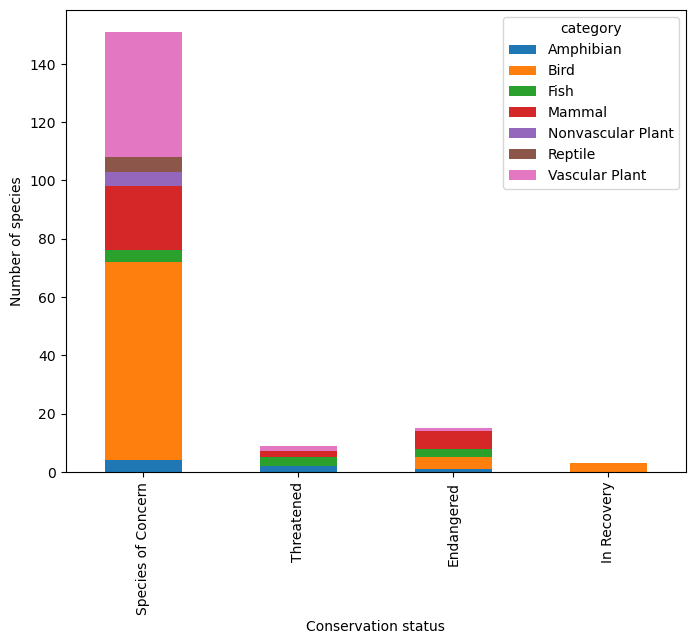

In [75]:
ax = conservation_cat[0:4].plot(kind='bar', figsize=(8, 6), stacked=True)
ax.set_xlabel('Conservation status')
ax.set_ylabel('Number of species')

**Summary:** Species of concern constitutes the biggest category, but overall the majority of species does not have a consrv. status. Whithin this category, birds are the biggest category of species, followed by vascular plants and mammals. Mammal is the most numerous category in Endangered species, while Birds are the only including species In recovery.

### Which class of animal is more prevalent?

To address this question, the dataframes `species` and `observations` are first merged.

In [80]:
merge = pd.merge(left=observations, right=species, on='scientific_name', how='left')
merge.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,GS Mountains,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No intervention
1,Neovison vison,GS Mountains,77,Mammal,American Mink,No intervention
2,Prunus subcordata,Yosemite,138,Vascular Plant,Klamath Plum,No intervention
3,Abutilon theophrasti,Bryce,84,Vascular Plant,Velvetleaf,No intervention
4,Githopsis specularioides,GS Mountains,85,Vascular Plant,Common Bluecup,No intervention


Then a new dataframe is created, which only contains animals and not plants. After that the number of species per category are counted.

In [81]:
animals = merge.loc[(merge['category'] != 'Vascular Plant') & (merge['category'] != 'Nonvascular Plant')]
animals.category.unique()

array(['Mammal', 'Bird', 'Amphibian', 'Reptile', 'Fish'], dtype=object)

In [82]:
animals.groupby('category').common_names.count()

category
Amphibian     320
Bird         2084
Fish          508
Mammal        856
Reptile       316
Name: common_names, dtype: int64

At this point, it is useful to create a new column with only the last part of the common animal name (eg. gull, bat, deer).
To do so, the common name is split on the space between the two words and only the second name is taken to fill the new column. It is needed to check at this point if there are mistakes in the names, and the mistakes are corrected manually.

In [83]:
name_split = animals.common_names.str.split(' ')
animals['last_names'] = name_split.str[-1]
animals.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,last_names
1,Neovison vison,GS Mountains,77,Mammal,American Mink,No intervention,Mink
6,Spizella pusilla,Yellowstone,228,Bird,Field Sparrow,No intervention,Sparrow
11,Cistothorus platensis,Bryce,114,Bird,Sedge Wren,No intervention,Wren
23,Larus philadelphia,Yosemite,167,Bird,Bonaparte's Gull,No intervention,Gull
29,Scaphiopus holbrookii holbrookii,Yosemite,177,Amphibian,Eastern Spadefoot,No intervention,Spadefoot


In [84]:
np.sort(animals.last_names.unique())

array(['(Feral)', '(Whipsnake)', '(Yellow-Rumped)', 'Anole', 'Avocet',
       'Badger', 'Barn-Owl', 'Barn-Owls', 'Bass', 'Bat', 'Bear', 'Beaver',
       'Bison', 'Bittern', 'Blackbird', 'Bluebird', 'Bluegill', 'Boa',
       'Bobcat', 'Bobolink', 'Bobwhite', 'Brant', 'Buffalo', 'Bufflehead',
       'Bullfrog', 'Bullhead', 'Bullsnake', 'Bunting', 'Bushtit',
       'Canvasback', 'Caracara', 'Cardinal', 'Carp', 'Catbird', 'Catfish',
       'Cattle', 'Chat', 'Chickadee', 'Chickaree', 'Chipmunk', 'Chub',
       "Chuck-Will's-Widow", 'Chukar', 'Collared-Dove', 'Condor', 'Coot',
       'Copperhead', 'Cormorant', 'Cottontail', 'Cowbird', 'Coyote',
       'Crane', 'Crappie', 'Creeper', 'Crossbill', 'Crow', 'Cuckoo',
       'Curlew', 'Dace', 'Darter', 'Deer', 'Dickcissel', 'Dipper', 'Dove',
       'Dowitcher', 'Drum', 'Duck', 'Dunlin', 'Eagle', 'Egret', 'Elk',
       'Ensatina', 'Falcon', 'Finch', 'Fisher', 'Flicker', 'Flycatcher',
       'Fox', 'Frog', 'Gadwall', 'Gar', 'Gnatcatcher', 'Goat', 'G

In [85]:
animals.last_names.replace('Lion)', 'Panther', inplace=True)
animals.last_names.replace('(Feral)', 'Sheep', inplace=True)
animals.last_names.replace(['(Whipsnake)', 'Snakes'], 'Snake', inplace=True)
animals.last_names.replace('(Yellow-Rumped)', 'Warbler', inplace=True)
animals.last_names.replace(['Barn-Owls', 'Barn-Owl', 'Owls', 'Pygmy-Owl', 'Screech-Owl'], 'Owl', inplace=True)
animals.last_names.replace('Night-Heron', 'Heron', inplace=True)
animals.last_names.replace('Weasel)', 'Weasel', inplace=True)
animals.last_names.replace('Toad)', 'Toad', inplace=True)

By looking at which animals are observed more it is possible to see that the first 3 positions are occupied in order by the bird warbler, the amphibian salamander and the bird sparrow.

In [86]:
animals.groupby(['last_names', 'category']).observations.sum().sort_values(ascending=False).reset_index().head(10)

,last_names,category,observations
0,Warbler,Bird,33394
1,Salamander,Amphibian,23377
2,Sparrow,Bird,16278
3,Snake,Reptile,15857
4,Owl,Bird,13094
5,Shiner,Fish,11473
6,Shrew,Mammal,10348
7,Darter,Fish,10313
8,Flycatcher,Bird,10022
9,Bat,Mammal,9462


Now it is possible to check the observations of the most prevalent animals per national park. We can see that Yellowstone has the highest number of observations of the most prevalent animals, and this is because it is the biggest park, with the biggest total amount of observations in all categories. 

In [87]:
most_prevalent = animals[(animals['last_names'] == 'Warbler') |\
                         (animals['last_names'] == 'Salamander') |\
                         (animals['last_names'] == 'Sparrow')]\
                    .groupby(['last_names', 'park_name'])\
                    .observations.sum()\
                    .reset_index()
most_prevalent

,last_names,park_name,observations
0,Salamander,Bryce,3946
1,Salamander,GS Mountains,3023
2,Salamander,Yellowstone,10234
3,Salamander,Yosemite,6174
4,Sparrow,Bryce,2777
5,Sparrow,GS Mountains,2134
6,Sparrow,Yellowstone,7027
7,Sparrow,Yosemite,4340
8,Warbler,Bryce,5760
9,Warbler,GS Mountains,4435


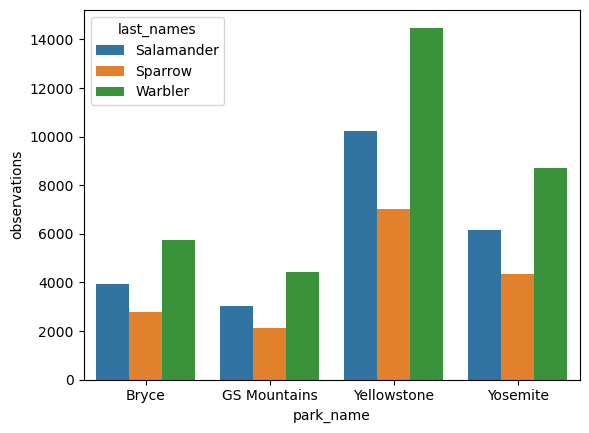

In [88]:
sns.barplot(data=most_prevalent, x='park_name', y='observations', hue='last_names')
plt.show()

In [89]:
#Distribution of observations of categories per national park
categories = animals.groupby(['category', 'park_name']).observations.sum().reset_index()
categories

,category,park_name,observations
0,Amphibian,Bryce,7380
1,Amphibian,GS Mountains,5707
2,Amphibian,Yellowstone,19440
3,Amphibian,Yosemite,11444
4,Bird,Bryce,51647
5,Bird,GS Mountains,37728
6,Bird,Yellowstone,127251
7,Bird,Yosemite,76207
8,Fish,Bryce,12423
9,Fish,GS Mountains,9206


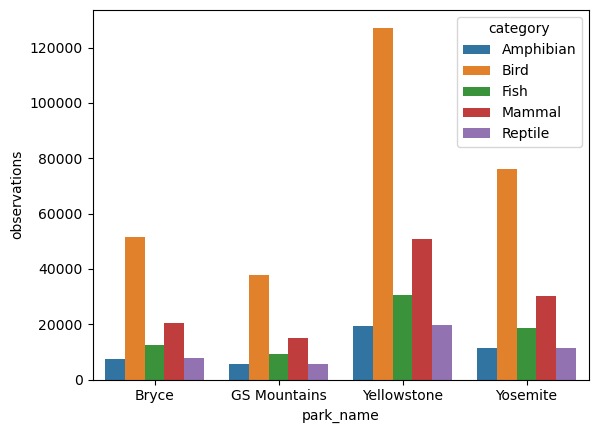

In [90]:
sns.barplot(data=categories, x='park_name', y='observations', hue='category')
plt.show()

**Summary:** The top 3 animal groups with the biggest amount of observations are the wiebler, the salamander and the sparrow. Yellowstone park is the national park with the most observations - possibly because it is the biggest one.

### Analysis on conservation

To explore the conservation of species, to both the dataframes `merge` and `animals` will be added a column that speficies if the specie is protected or not, based on the conservation status. After that, the percentage of protected species by category will be visualized.

In [149]:
merge['protected'] = merge.conservation_status != 'No intervention'
animals['protected'] = animals.conservation_status != 'No intervention'

In [148]:
protected_cat = merge.groupby(['category', 'protected']).scientific_name.count().unstack().reset_index()
protected_cat.columns = ['category', 'not_protected', 'protected']

protected_cat['percent_protected'] = protected_cat['protected'] / (protected_cat['protected'] + protected_cat['not_protected']) *100
protected_cat

,category,not_protected,protected,percent_protected
0,Amphibian,292,28,8.750000
1,Bird,1768,316,15.163148
2,Fish,468,40,7.874016
3,Mammal,704,152,17.757009
4,Nonvascular Plant,1312,20,1.501502
5,Reptile,296,20,6.329114
6,Vascular Plant,17696,184,1.029083


Finally, it was visualized the relationship between the number of observations per park for some protected animals. At the bottom, the information related to bats are shown.

In [150]:
animals_protected = animals[animals['protected'] == True]\
    .groupby(['last_names', 'park_name'])\
    .observations.sum()\
    .reset_index()
animals_protected.last_names.unique()

array(['Badger', 'Bat', 'Bear', 'Beaver', 'Bittern', 'Bluebird', 'Chat',
       'Chub', 'Condor', 'Cormorant', 'Coyote', 'Crane', 'Creeper',
       'Crossbill', 'Cuckoo', 'Darter', 'Eagle', 'Falcon', 'Flycatcher',
       'Frog', 'Godwit', 'Grebe', 'Grosbeak', 'Gull', 'Hare', 'Harrier',
       'Hawk', 'Hellbender', 'Heron', 'Hummingbird', 'Ibis', 'Jay',
       'Kingsnake', 'Kite', 'Lizard', 'Longspur', 'Loon', 'Madtom',
       'Magpie', 'Martin', 'Merlin', 'Myotis', 'Osprey', 'Owl', 'Pelican',
       'Phainopepla', 'Pigeon', 'Rabbit', 'Rail', 'Ringtail',
       'Salamander', 'Sandpiper', 'Sapsucker', 'Scaup', 'Sculpin',
       'Sheep', 'Shrew', 'Shrike', 'Snake', 'Sparrow', 'Squirrel',
       'Sucker', 'Swallow', 'Swan', 'Swift', 'Tanager', 'Tern',
       'Thrasher', 'Toad', 'Towhee', 'Trout', 'Vulture', 'Warbler',
       'Wolf', 'Woodpecker', 'Wren'], dtype=object)

In [157]:
heron = animals[animals['last_names'] == 'Heron']\
    .groupby(['park_name', 'protected'])\
    .observations.sum()\
    .reset_index()

heron

,park_name,protected,observations
0,Bryce,False,531
1,Bryce,True,281
2,GS Mountains,False,454
3,GS Mountains,True,221
4,Yellowstone,False,1299
5,Yellowstone,True,638
6,Yosemite,False,785
7,Yosemite,True,430


In [158]:
owl = animals[animals['last_names'] == 'Owl']\
    .groupby(['park_name', 'protected'])\
    .observations.sum()\
    .reset_index()

owl

,park_name,protected,observations
0,Bryce,False,2189
1,Bryce,True,176
2,GS Mountains,False,1612
3,GS Mountains,True,101
4,Yellowstone,False,5218
5,Yellowstone,True,478
6,Yosemite,False,3064
7,Yosemite,True,256


In [140]:
bat = animals[animals['last_names'] == 'Bat']\
    .groupby(['park_name', 'protected'])\
    .observations.sum()\
    .reset_index()

bat

,park_name,protected,observations
0,Bryce,False,982
1,Bryce,True,666
2,GS Mountains,False,812
3,GS Mountains,True,446
4,Yellowstone,False,2537
5,Yellowstone,True,1603
6,Yosemite,False,1528
7,Yosemite,True,888


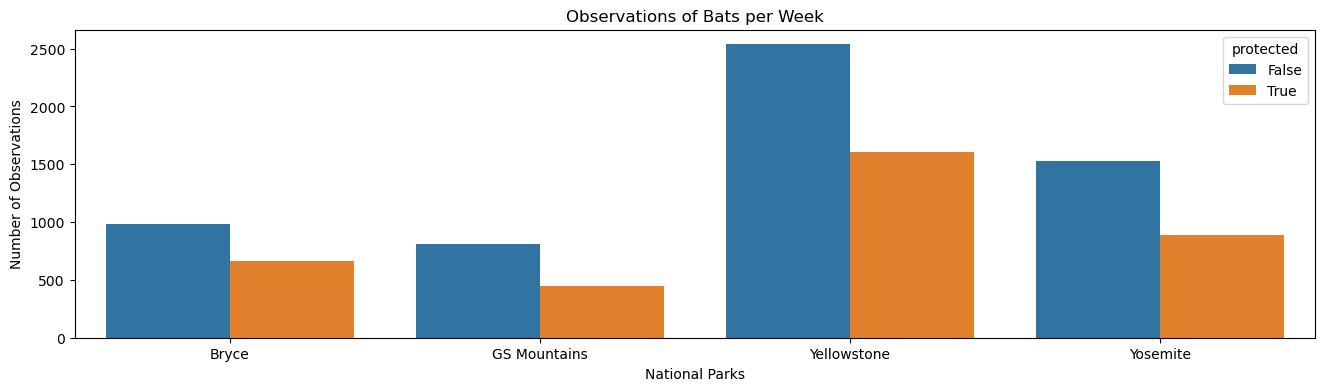

In [145]:
plt.figure(figsize=(16, 4))
sns.barplot(x=bat.park_name, y= bat.observations, hue=bat.protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

# Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that warblers occurred the most number of times and they were most likely to be found in Yellowstone National Park.
    
### Further Research 

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 